# Assignment 1 - Linear Regression

Class: COMP 5630 - Machine Learning

Author: Chris Hinkson

Email: cmh0201@auburn.edu

In [35]:
'''
MODULE IMPORTS

This code cell will import any necessary modules.
'''

# System
import os

# Data
import numpy as np
import matplotlib.pyplot as plt

# Display
from tqdm import tqdm

Attempting to load training and testing data from directory `../data/`!
-> Reshaped training X data to shape (100, 1)!
-> Reshaped training Y data to shape (100, 1)!
-> Reshaped testing X data to shape (100, 1)!
-> Reshaped testing Y data to shape (100, 1)!
Successfully loaded training and testing data from directory `../data/`!
-> Data Shape: trainingX = (100, 1), trainingY = (100, 1), testingX = (100, 1), testingY = (100, 1)
-> Data Mean: trainingX = -0.11, trainingY = -139.92, testingX = 0.09, testingY = 5.54
-> Data StdDev: trainingX = 1.70, trainingY = 658.01, testingX = 0.58, testingY = 7.14


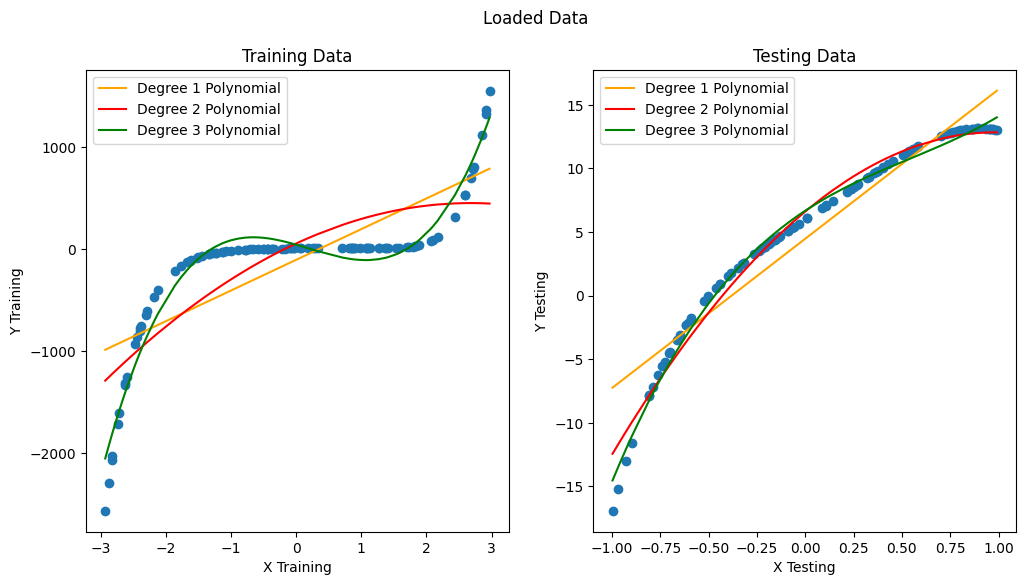

In [60]:
'''
DATA LOADER CLASS

This code cell will provide a DataLoader class to load provided numpy arrays for use in
the linear regression model. 
'''
class DataLoader:

	# Class Constructor
	def __init__(self, dataDirectoryPath: str="../data/", plotData: bool=False) -> None:

		# Save directory path
		self.dataDirectoryPath = dataDirectoryPath

		# Announce data load
		print(f"Attempting to load training and testing data from directory `{self.dataDirectoryPath}`!")

		# Define x_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		xTrainPath = os.path.join(self.dataDirectoryPath, "x_train.npy")
		if not os.path.exists(xTrainPath):
			raise FileNotFoundError(f"Attempted to load X-Train numpy array but could not find file `{xTrainPath}`!")
		self.trainingX = np.load(xTrainPath)
		if self.trainingX is None:
			raise Exception(f"Attempted to load X-Train numpy array but the array was not set!")
		if len(self.trainingX.shape) == 1:
			self.trainingX = self.trainingX.reshape(-1, 1)
			print(f"-> Reshaped training X data to shape {self.trainingX.shape}!")

		# Define y_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTrainPath = os.path.join(self.dataDirectoryPath, "y_train.npy")
		if not os.path.exists(yTrainPath):
			raise FileNotFoundError(f"Attempted to load Y-Train numpy array but could not find file `{yTrainPath}`!")
		self.trainingY = np.load(yTrainPath)
		if self.trainingY is None:
			raise Exception(f"Attempted to load Y-Train numpy array but the array was not set!")
		if len(self.trainingY.shape) == 1:
			self.trainingY = self.trainingY.reshape(-1, 1)
			print(f"-> Reshaped training Y data to shape {self.trainingY.shape}!")

		# Define x_test path, check if it exists, load data if so, verify load, then reshape for model if necessary 
		xTestPath = os.path.join(self.dataDirectoryPath, "x_test.npy")
		if not os.path.exists(xTestPath):
			raise FileNotFoundError(f"Attempted to load X-Test numpy array but could not find file `{xTestPath}`!")
		self.testingX = np.load(xTestPath)
		if self.testingX is None:
			raise Exception(f"Attempted to load X-Test numpy array but the array was not set!")
		if len(self.testingX.shape) == 1:
			self.testingX = self.testingX.reshape(-1, 1)
			print(f"-> Reshaped testing X data to shape {self.testingX.shape}!")

		# Define y_test path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTestPath = os.path.join(self.dataDirectoryPath, "y_test.npy")
		if not os.path.exists(yTestPath):
			raise FileNotFoundError(f"Attempted to load Y-Test numpy array but could not find file `{yTestPath}`!")
		self.testingY = np.load(yTestPath)
		if self.testingY is None:
			raise Exception(f"Attempted to load Y-Test numpy array but the array was not set!")
		if len(self.testingY.shape) == 1:
			self.testingY = self.testingY.reshape(-1, 1)
			print(f"-> Reshaped testing Y data to shape {self.testingY.shape}!")

		# Print data load information
		print(f"Successfully loaded training and testing data from directory `{self.dataDirectoryPath}`!")
		print(f"-> Data Shape: trainingX = {self.trainingX.shape}, trainingY = {self.trainingY.shape}, testingX = {self.testingX.shape}, testingY = {self.testingY.shape}")
		print(f"-> Data Mean: trainingX = {np.mean(self.trainingX):.2f}, trainingY = {np.mean(self.trainingY):.2f}, testingX = {np.mean(self.testingX):.2f}, testingY = {np.mean(self.testingY):.2f}")
		print(f"-> Data StdDev: trainingX = {np.std(self.trainingX):.2f}, trainingY = {np.std(self.trainingY):.2f}, testingX = {np.std(self.testingX):.2f}, testingY = {np.std(self.testingY):.2f}")

		# Create class figure and axes incase if want to plot data
		if plotData:

			# Configure plot figure
			self._createPlotFigure()

			# Create plots
			self.plotTrainingData()
			self.plotTestingData()

		else:
			# If we aren't going to have plots yet, set values to None
			self.fig, (self.ax1, self.ax2) = None, (None, None)

	# Create class figure and axes
	def _createPlotFigure(self) -> None:
		self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(12, 6))
		self.fig.suptitle("Loaded Data")
		self.fig.canvas.draw()

	# Plot training data
	def plotTrainingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax1.set_title("Training Data")
		self.ax1.set_xlabel("X Training")
		self.ax1.set_ylabel("Y Training")

		# Get data back as 1D vector for plotting
		trainingXvector = self.trainingX.flatten()
		trainingYvector = self.trainingY.flatten()

		# Plot training data
		self.ax1.scatter(trainingXvector, trainingYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 1))(np.unique(trainingXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 2))(np.unique(trainingXvector)), color='red', label='Degree 2 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 3))(np.unique(trainingXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax1.legend()
		self.fig.canvas.draw()

	# Plot testing data
	def plotTestingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax2.set_title("Testing Data")
		self.ax2.set_xlabel("X Testing")
		self.ax2.set_ylabel("Y Testing")

		# Get data back as 1D vector for plotting
		testXvector = self.testingX.flatten()
		testYvector = self.testingY.flatten()

		# Plot testing data
		self.ax2.scatter(testXvector, testYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 1))(np.unique(testXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 2))(np.unique(testXvector)), color='red', label='Degree 2 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 3))(np.unique(testXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax2.legend()
		self.fig.canvas.draw()

# Load data from the data directory
Task1DataLoader = DataLoader(dataDirectoryPath="../data/", plotData=True)

In [61]:
'''
LINEAR REGRESSION CLASS

This code cell will provide a LinearRegression class to perform linear regression on a given dataset.
'''
class LinearRegression:

	# Class Constructor
	def __init__(self, learningRate: float=0.01, numIterations: int=1000) -> None:

		# Initialize instance variables
		self.learningRate = learningRate
		self.numIterations = numIterations
		self.weights = None
		self.bias = None
		self.trainingLosses = []

	# Train the model on a given dataset 
	def trainModel(self, trainingX: np.ndarray, trainingY: np.ndarray) -> np.ndarray:

		# Print training data information
		print(f"-> Beginning model training with learning rate {self.learningRate} for {self.numIterations} iterations!")

		# If weights have not been initialized, set them all to zero
		if self.weights is None:
			self.weights = np.zeros(shape=(trainingX.shape[1], 1))
			self.bias = 0
			print(f"-> Initialized weights (shape {self.weights.shape}) and bias to zeros!")

		# Perform gradient descent for the specified number of iterations
		for iteration in tqdm(iterable=range(self.numIterations), desc="Training Progress", unit="iterations"):

			# Calculate the predictions, which is X * weights + bias, and should result in same shape as trainingX
			predictionsY = np.dot(trainingX, self.weights) + self.bias

			# Calculate MSE loss for the iteration
			self.trainingLosses.append(self._calculateMSE(predictionsY, trainingY))

			# Update the weights by calculating the loss gradient
			weightsGradient = (2 / trainingX.shape[0]) * np.dot(trainingX.T, (predictionsY - trainingY))
			self.weights -= self.learningRate * weightsGradient
			
			# Update the bias by calculating the loss gradient
			biasGradient = (2 / trainingX.shape[0]) * np.sum(predictionsY - trainingY)
			self.bias -= self.learningRate * biasGradient

		# Return losses
		self.trainingLosses = np.array(self.trainingLosses)
		return self.trainingLosses

	# Evaluate model performance on given dataset
	def testModel(self, testX: np.ndarray, testY: np.ndarray) -> tuple:

		# Get predictions
		predictionsY = self._predict(testX)

		# Calculate metrics
		testMeanSquaredError = self._calculateMSE(predictionsY, testY)
		testMeanAbsoluteError = self._calculateMAE(predictionsY, testY)
		testRSquared = self._calculateRSquared(predictionsY, testY)

		# Return
		return testMeanSquaredError, testMeanAbsoluteError, testRSquared, predictionsY

	# Make batch predictions on input data
	def _predict(self, inputX: np.ndarray) -> np.ndarray:

		# Check if model has been trained
		if (self.weights is None) or (self.bias is None):
			raise Exception("The weights and bias are not set yet! Please train model before making predictions!")
		
		# Return predictions
		return np.dot(inputX, self.weights) + self.bias
	
	# Calculate Mean Squared Error
	def _calculateMSE(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		return np.mean((predictedY - actualY) ** 2)
	
	# Calculate Mean Absolute Error
	def _calculateMAE(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		return np.mean(np.abs(predictedY - actualY))
	
	# Calculate R Squared
	def _calculateRSquared(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		residualSumOfSquared = np.sum((actualY - predictedY) ** 2)
		totalSumOfSquares = np.sum((actualY - np.mean(actualY)) ** 2)
		return 1 - (residualSumOfSquared / totalSumOfSquares)




Creating Linear Regression Model for Degree 1!
-> Beginning model training with learning rate 0.01 for 500 iterations!
-> Initialized weights (shape (1, 1)) and bias to zeros!


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 30293.41iterations/s]

Degree 1 test metrics: MSE = 35280.72714675266, MAE = 157.46467543156024, R^2 = -690.8898422162317


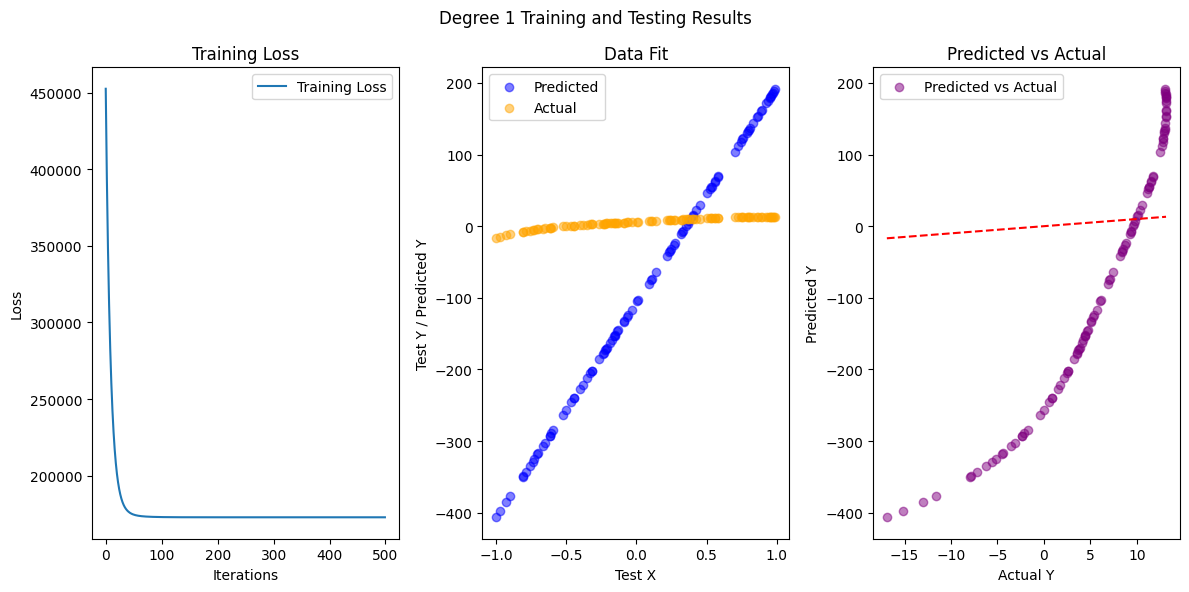



Creating Linear Regression Model for Degree 2!
-> Beginning model training with learning rate 0.01 for 500 iterations!
-> Initialized weights (shape (2, 1)) and bias to zeros!


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 94910.93iterations/s]


Degree 2 test metrics: MSE = 29017.889885157012, MAE = 145.97576639382137, R^2 = -568.0694290561762


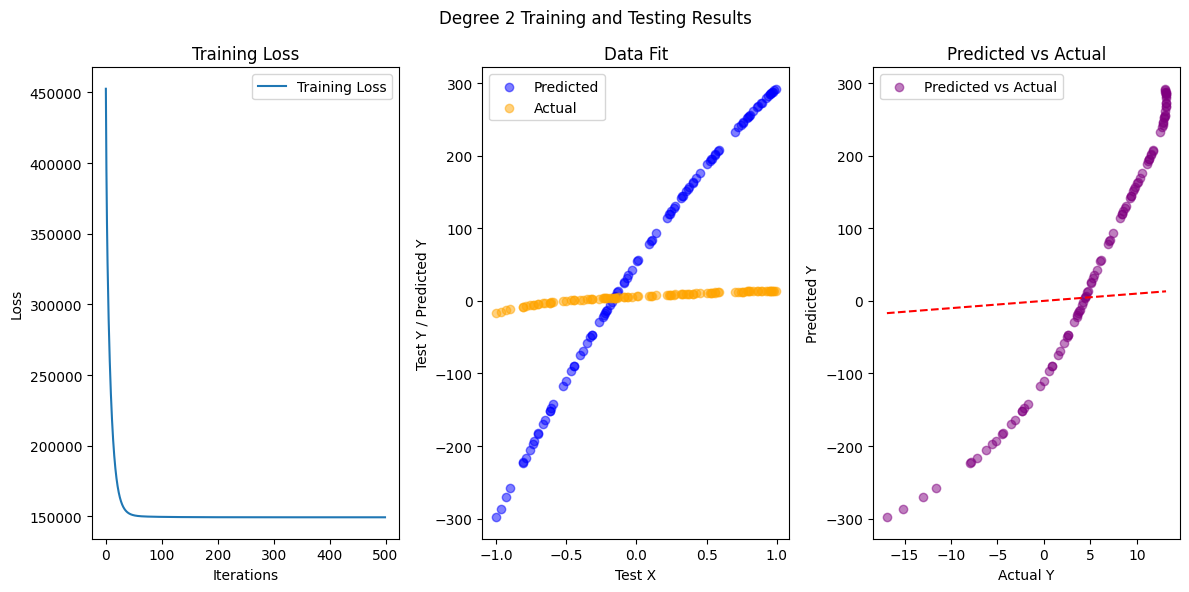



Creating Linear Regression Model for Degree 3!
-> Beginning model training with learning rate 0.01 for 500 iterations!
-> Initialized weights (shape (3, 1)) and bias to zeros!


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 108385.55iterations/s]

Degree 3 test metrics: MSE = 4.1641594436104666e+75, MAE = 4.558809480259716e+37, R^2 = -8.16632720867281e+73


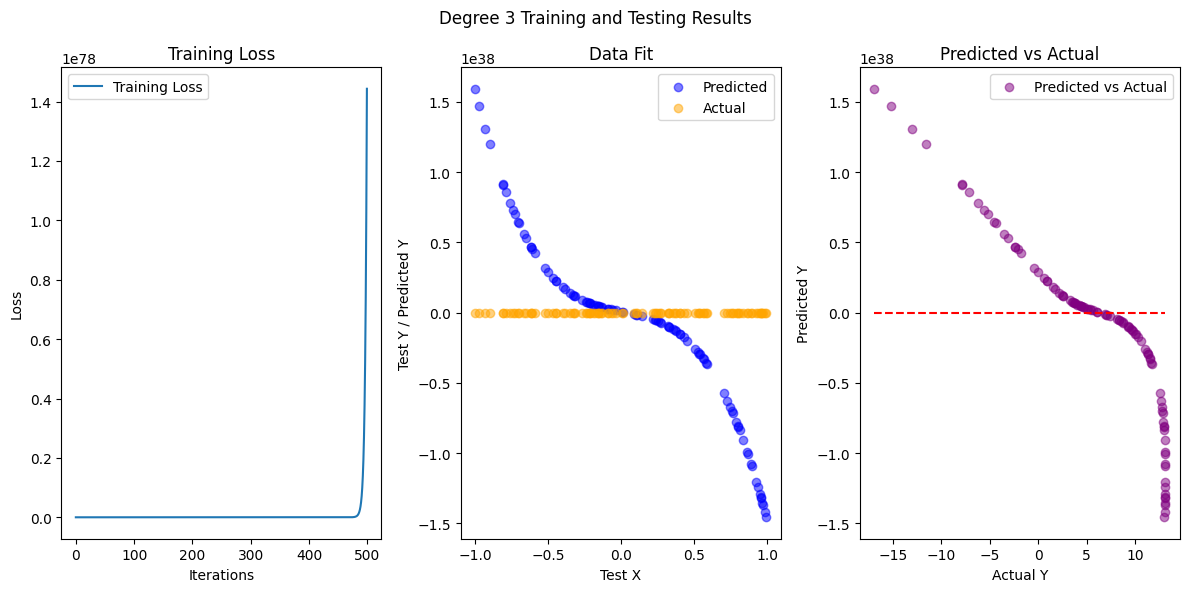

In [ ]:
'''
TASK 1 EXECUTION

This code cell will create a linear regression model then train and test it on the provided datasets.

Due to findings in the data, I have created a simple way to show both simple linear regression results
(where degree is just 1) and polynomial regression results (with degrees 2 and 3). Although this was
not explicitly described in the assignment instructions, I believe it is necessary to show the differences
and provide better evaluation of model predictions.
'''

# Iterate through polynomial degrees 1, 2, and 3
for degree in [1, 2, 3]:

	# Get the training and test data for the current degree
	if degree == 1:
		# For degree 1, we just use the original data
		trainingX = Task1DataLoader.trainingX
		testX = Task1DataLoader.testingX
	else:
		# For higher degrees, we have to loop and calculate the feature for each level then stack together to get a new dataset
		trainingNewPolynomialFeatures = []
		testNewPolynomialFeatures = []
		for i in range(2, degree + 1):
			trainingNewPolynomialFeatures.append(np.power(Task1DataLoader.trainingX, i))
			testNewPolynomialFeatures.append(np.power(Task1DataLoader.testingX, i))
		trainingX = np.hstack([Task1DataLoader.trainingX, *trainingNewPolynomialFeatures])
		testX = np.hstack([Task1DataLoader.testingX, *testNewPolynomialFeatures])

	# Initialize model, train, and test
	print(f"\nCreating Linear Regression Model for Degree {degree}!")
	LinearRegressionModel = LinearRegression(learningRate=0.01, numIterations=500)
	trainingLosses = LinearRegressionModel.trainModel(trainingX, Task1DataLoader.trainingY)
	testMeanSquaredError, testMeanAbsoluteError, testRSquared, predictionsY = LinearRegressionModel.testModel(testX, Task1DataLoader.testingY)
	print(f"Degree {degree} test metrics: MSE = {testMeanSquaredError}, MAE = {testMeanAbsoluteError}, R^2 = {testRSquared}")

	# Make plot figure to display results (loss over time, predictions vs actual)
	fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
	fig.suptitle(f"Degree {degree} Training and Testing Results")
	fig.canvas.draw()

	# Plot training loss over iterations
	ax1.plot(trainingLosses, label="Training Loss")
	ax1.set_title("Training Loss")
	ax1.set_xlabel("Iterations")
	ax1.set_ylabel("Loss")
	ax1.legend()

	# Plot x vs y predictions and actual
	ax2.scatter(testX[:, 0], predictionsY, color='blue', alpha=0.5, label='Predicted')
	ax2.scatter(testX[:, 0], Task1DataLoader.testingY, color='orange', alpha=0.5, label='Actual')
	ax2.set_title("Data Fit")
	ax2.set_xlabel("Test X")
	ax2.set_ylabel("Test Y / Predicted Y")
	ax2.legend()

	# Plot y predictions vs actual (and ideal line)
	ax3.scatter(Task1DataLoader.testingY, predictionsY, color='purple', alpha=0.5, label='Predicted vs Actual')
	ax3.plot([min(Task1DataLoader.testingY), max(Task1DataLoader.testingY)], [min(Task1DataLoader.testingY), max(Task1DataLoader.testingY)], 'r--')
	ax3.set_title("Predicted vs Actual")
	ax3.set_xlabel("Actual Y")
	ax3.set_ylabel("Predicted Y")
	ax3.legend()

	# Show plots
	plt.tight_layout()
	plt.show()